# Load Plugins:

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import time

# Make Sure Simulation and Tests are Calibrated:

In [3]:
#Trial run: Simulate two pairs of null data (no difference in mean or variance), perform a t-test.
#Do this 10,000 times:
num_trials = 10000
pvalue_list = []
for trialnum in range(num_trials):
    results1 = np.random.normal(0,1,20)
    results2 = np.random.normal(0,1,20)
    statistic, pvalue = stats.ttest_ind(results1,results2)
    pvalue_list.append(pvalue)

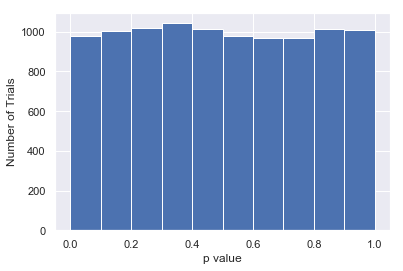

In [4]:
#Make sure the distribution of p-values is roughly uniform:
n, bins, patches = plt.hist(pvalue_list)
plt.xlabel('p value')
plt.ylabel('Number of Trials')
plt.show()

In [5]:
#For reference, this is what happens if the means are different:
#Do this 10,000 times:
num_trials = 10000
pvalue_list = []
for trialnum in range(num_trials):
    results1 = np.random.normal(0.5,1,20)
    results2 = np.random.normal(0,1,20)
    statistic, pvalue = stats.ttest_ind(results1,results2)
    pvalue_list.append(pvalue)

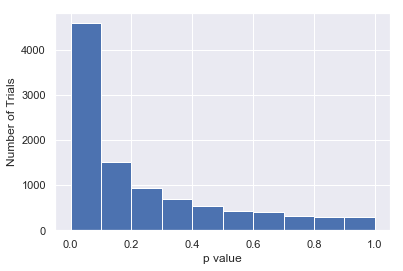

In [6]:
#Expect the distribution of p-values is not uniform:
n, bins, patches = plt.hist(pvalue_list)
plt.xlabel('p value')
plt.ylabel('Number of Trials')
plt.show()

# Simulate 43 *NULL* statistical tests, see what the distribution of false positives (p<0.05) looks like:

In [7]:
starttime = time.clock()

num_events = 43 #21 female events and 22 male events -- none of the male events were significant, by chance

num_simulations = 1000

num_false_positives_list = []
for simulation in range(num_simulations):
    false_positive_counter = 0
    for trialnum in range(num_events):
        results1 = np.random.normal(0,1,20)
        results2 = np.random.normal(0,1,20)
        statistic, pvalue = stats.ttest_ind(results1,results2)
        if pvalue<0.05:
            false_positive_counter+=1
    num_false_positives_list.append(false_positive_counter) #record the number of false positives for each simulation

print 'total time = '+ repr(time.clock()-starttime)

total time = 27.545352999999995


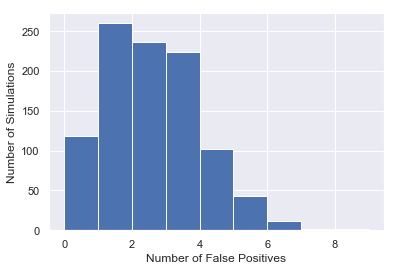

In [8]:
n, bins, patches = plt.hist(num_false_positives_list,max(num_false_positives_list))
plt.xlabel('Number of False Positives')
plt.ylabel('Number of Simulations')
plt.show()

In [9]:
num_false_positives_list = np.array(num_false_positives_list)
print len(num_false_positives_list[num_false_positives_list>2]), len(num_false_positives_list)
print float(len(num_false_positives_list[num_false_positives_list>2]))/len(num_false_positives_list)

385 1000
0.385


# Conclusion: Roughly 1/3 of the time you perform such a trial you will obtain 3 or more false positives.  Therefore it's reasonably likely that these are all false positives!

# What about p<0.09 instead of p<0.05?

In [10]:
starttime = time.clock()

num_events = 43 #21 female events and 22 male events -- none of the male events were significant, by chance

num_simulations = 1000

num_false_positives_list = []
for simulation in range(num_simulations):
    false_positive_counter = 0
    for trialnum in range(num_events):
        results1 = np.random.normal(0,1,20)
        results2 = np.random.normal(0,1,20)
        statistic, pvalue = stats.ttest_ind(results1,results2)
        if pvalue<0.09:
            false_positive_counter+=1
    num_false_positives_list.append(false_positive_counter) #record the number of false positives for each simulation

print 'total time = '+ repr(time.clock()-starttime)

total time = 27.508379000000005


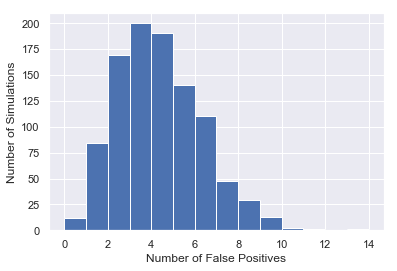

In [11]:
n, bins, patches = plt.hist(num_false_positives_list,max(num_false_positives_list))
plt.xlabel('Number of False Positives')
plt.ylabel('Number of Simulations')
plt.show()

In [12]:
num_false_positives_list = np.array(num_false_positives_list)
print len(num_false_positives_list[num_false_positives_list>3]), len(num_false_positives_list)
print float(len(num_false_positives_list[num_false_positives_list>3]))/len(num_false_positives_list)

535 1000
0.535


# Conclusion: More than half the time you do such a study you will find 4 or more false positives at the p<0.09 level!